In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris() 
X = iris.data # Sepal and pedal negth and width y = iris.target
y = iris.target

In [2]:
from sklearn.cluster import KMeans

In [3]:
#n_jobs = 4 works on 4 CPU cores making calculations faster on large data
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21) 
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [4]:
centers = km.cluster_centers_ 
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'Predicted')

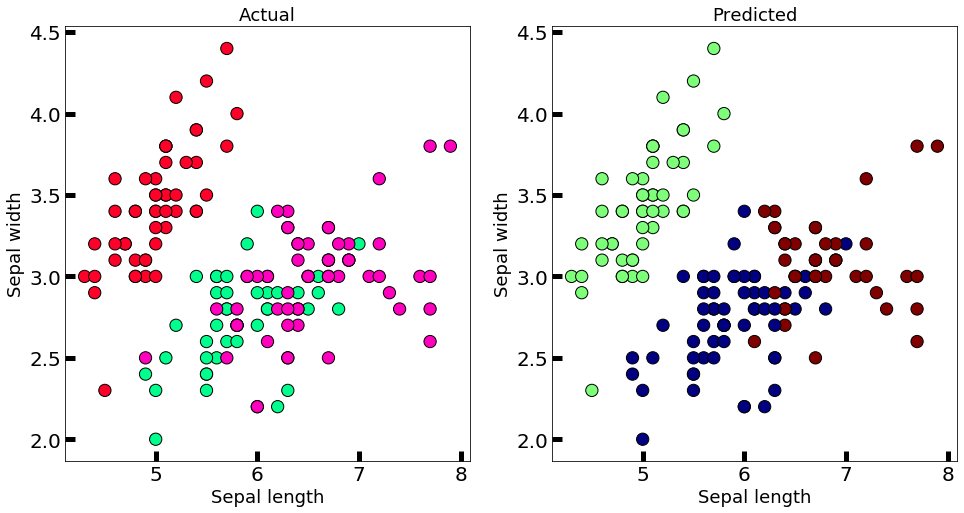

In [9]:
import matplotlib.pyplot as plt
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answersfig, 
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [6]:
#Using elbow method to find optimim k
distortions = [] 
K = range(1,10) 
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X) 
    distortions.append(kmeanModel.inertia_) 
    

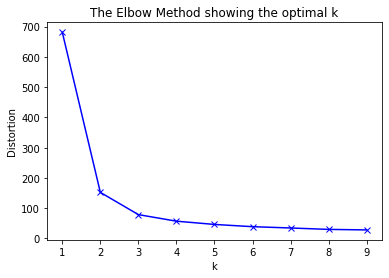

In [7]:
# Plot the elbow 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method showing the optimal k') 
plt.show()

In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


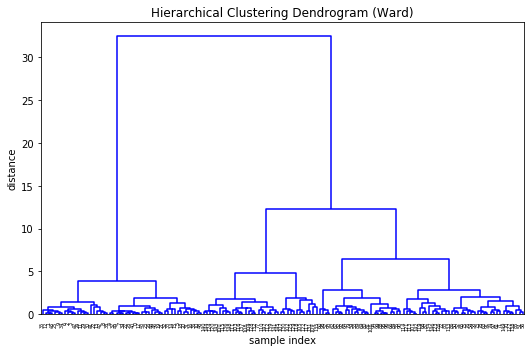

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()


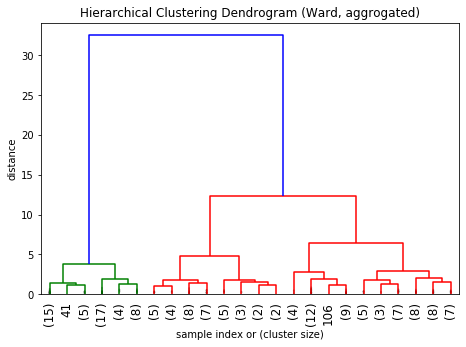

In [21]:
#Too many legs above; aggregrated legs below for easier reading
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

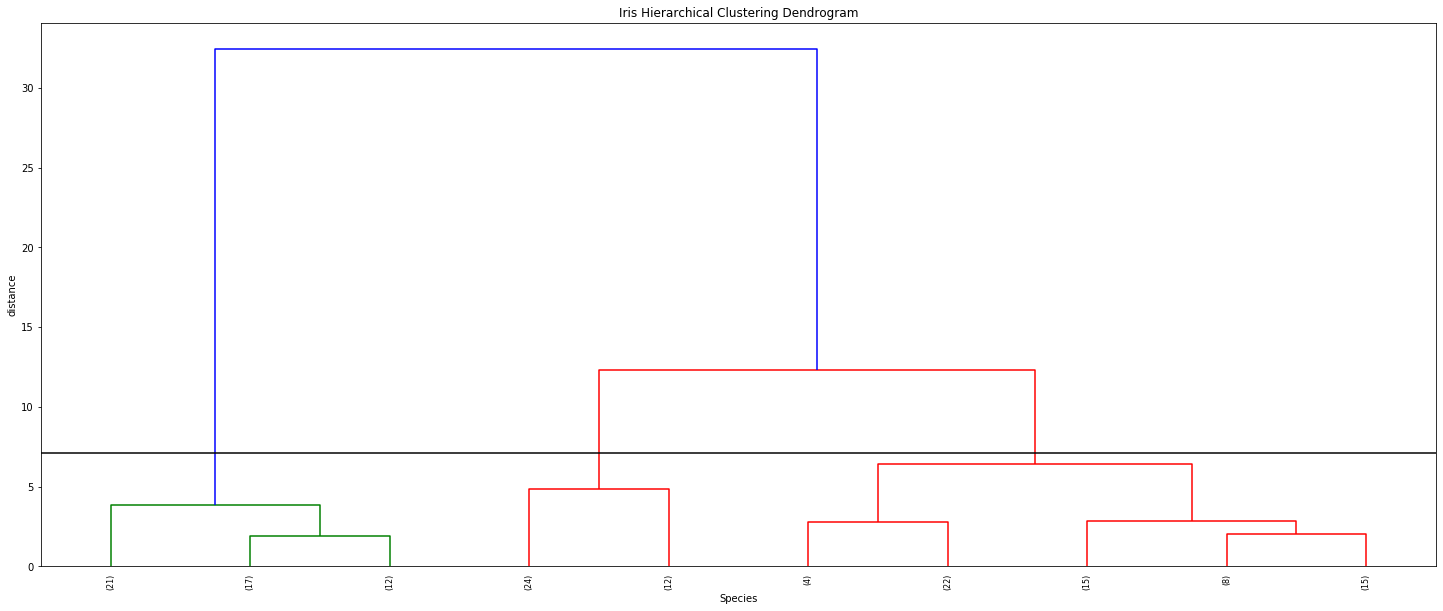

In [28]:
    #Hierachy Clustering, class dendogram below; other dendogram above
    #with different coding from example online
    from scipy.cluster.hierarchy import dendrogram, linkage
    hier=linkage(X,"ward") #generate the linkage matrix
    max_d=7.08 #max distance
    plt.figure(figsize=(25,10))
    plt.title('Iris Hierarchical Clustering Dendrogram')
    plt.xlabel('Species')
    plt.ylabel('distance')
    dendrogram(
        hier,
        truncate_mode='lastp',  # show only last p merged clusters
        p=10,  #Try changing values of p                
        leaf_rotation=90.,   #rotates x axis labels   
        leaf_font_size=8.,  #font size for axis labels   
    )
    plt.axhline(y=max_d, c='k')
    plt.show()